# Examples for Day 2

In [1]:
# initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# %load ml15.py
# Feature Selection with Univariate Selection
from pandas import read_csv
from sklearn.feature_selection import SelectKBest
# load data
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
selector = SelectKBest(k=4)
features = selector.fit_transform(X, y)
selected = selector.get_support()
# Show selected features
print([header[i] for i, j in enumerate(selected) if j])


['preg', 'plas', 'mass', 'age']


In [4]:
selected

array([ True,  True, False, False, False,  True, False,  True])

In [8]:
# %load ml16.py
# Model-based Feature Selection with Random Forest
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:, :-1]
y = array[:, -1]
selector = SelectFromModel(RandomForestClassifier(), threshold='median')
features = selector.fit_transform(X, y)
selected = selector.get_support()
# Show selected features
print([names[i] for i in range(len(names)-1) if selected[i]])


['plas', 'mass', 'pedi', 'age']


In [11]:
# %load ml17.py
# Feature Selection with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=4)
features = rfe.fit_transform(X, y)
selected = rfe.get_support()
# Show selected features
print([header[i] for i, j in enumerate(selected) if j])


['plas', 'mass', 'pedi', 'age']


In [13]:
# %load ml18.py
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
# Split into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(f"Accuracy: {result:.2%}")


Accuracy: 70.08%


In [19]:
import numpy as np
u, c = np.unique(y, return_counts=True)
print(u, c/len(y), sep=",")

u_train, c_train = np.unique(y_train, return_counts=True)
print(u_train, c_train/len(y_train), sep=",")

u_test, c_test = np.unique(y_test, return_counts=True)
print(u_test, c_test/len(y_test), sep=",")

[0 1],[0.65104167 0.34895833]
[0 1],[0.6459144 0.3540856]
[0 1],[0.66141732 0.33858268]


In [21]:
# %load ml19.py
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
# Split into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, stratify=y, test_size=0.33, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(f"Accuracy: {result:.2%}")


Accuracy: 72.44%


In [22]:
u, c = np.unique(y, return_counts=True)
print(u, c/len(y), sep=",")

u_train, c_train = np.unique(y_train, return_counts=True)
print(u_train, c_train/len(y_train), sep=",")

u_test, c_test = np.unique(y_test, return_counts=True)
print(u_test, c_test/len(y_test), sep=",")

[0 1],[0.65104167 0.34895833]
[0 1],[0.65175097 0.34824903]
[0 1],[0.6496063 0.3503937]


In [24]:
# %load ml20.py
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
model = KNeighborsClassifier()
# Create 3 partitions
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# Perform 3-fold cross-validation
results = cross_val_score(model, X, y, cv=kfold)
print(f"Accuracy: {results.mean():.2%} ({results.std():.2%})")


Accuracy: 72.14% (1.92%)


In [26]:
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier

df = read_csv("data/rescale.csv")
df.head()

,feature1,feature2,label
0,-4.083310,-10963.008707,0
1,0.751363,-7153.781270,1
2,5.706203,-7830.473386,1
3,-6.522791,-9145.506169,0
4,-7.362259,2846.910782,2


In [27]:
df.describe()

,feature1,feature2,label
count,300.000000,300.000000,300.000000
mean,-3.112509,-5458.703355,1.000000
std,5.260577,5641.865215,0.817861
min,-14.482280,-14742.240961,0.000000
25%,-7.036305,-9750.407678,0.000000
50%,-4.439516,-7862.241840,1.000000
75%,1.833269,611.843991,2.000000
max,8.907468,6395.905063,2.000000


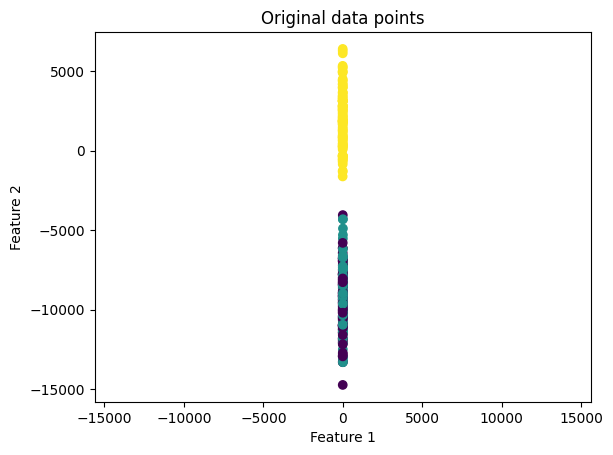

In [29]:
# Plot features
plt.scatter(df["feature1"], df["feature2"], c=df["label"])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original data points")
plt.axis("equal")
plt.show()

In [30]:
X = df.drop(columns=["label"])
y = df["label"]

X1_train, X1_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)

knn1 = KNeighborsClassifier().fit(X1_train, y_train)
print(f"knn1 accuracy: {knn1.score(X1_test, y_test):.3%}")

knn1 accuracy: 66.667%


In [31]:
scaler = MinMaxScaler()
X2_train = scaler.fit_transform(X1_train)
X2_test = scaler.transform(X1_test)

knn2 = KNeighborsClassifier().fit(X2_train, y_train)
print(f"knn2 accuracy: {knn2.score(X2_test, y_test):.3%}")

knn2 accuracy: 98.667%


In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as split
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
X.shape, np.unique(y)

((569, 30), array([0, 1]))

In [33]:
X1_train, X1_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)

knn1 = KNeighborsClassifier().fit(X1_train, y_train)
print(f"knn1 accuracy: {knn1.score(X1_test, y_test):.3%}")

knn1 accuracy: 96.503%


In [34]:
selector = RFE(RandomForestClassifier(), n_features_to_select=10)
X2_train = selector.fit_transform(X1_train, y_train)
X2_test = selector.transform(X1_test)

knn2 = KNeighborsClassifier().fit(X2_train, y_train)
print(f"knn2 accuracy: {knn2.score(X2_test, y_test):.3%}")

knn2 accuracy: 95.105%


In [37]:
from joblib import dump
dump(knn1, "knn1.job")
dump(knn2, "knn2.job")

['knn2.job']

In [40]:
from joblib import load
model1 = load("knn1.job")
print(model1.score(X1_test, y_test))
model1.predict([X1_test[1]])

0.965034965034965


array([0])

In [42]:
# %load ml21.py
# Linear Regression
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from pandas import read_csv
df = read_csv("data/real_estate_valuation_dataset.csv")
X = df.drop(columns=['House price of unit area'])
y = df['House price of unit area']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print(f'R2 score: {lr.score(X_test, y_test):.2f}')


R2 score: 0.58


In [44]:
# %load ml22.py
# k-NN Regressor
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
from pandas import read_csv
df = read_csv("data/real_estate_valuation_dataset.csv")
X = df.drop(columns=['House price of unit area'])
y = df['House price of unit area']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
print(f'R2 score: {knn.score(X_test, y_test):.2f}')


R2 score: 0.61


In [46]:
# %load ml23.py
# Logistic Regression
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.values[:,:-1]
y = df.values[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
lgr = LogisticRegression().fit(X_train, y_train)
print(f'Accuracy: {lgr.score(X_test, y_test):.2%}')

Accuracy: 72.92%


In [48]:
# %load ml24.py
# k-NN Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.values[:,:-1]
y = df.values[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsClassifier().fit(X_train, y_train)
print(f'Accuracy: {knn.score(X_test, y_test):.2%}')


Accuracy: 65.62%


In [49]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
Xs_train = scl.fit_transform(X_train)
Xs_test = scl.transform(X_test)

knn2 = KNeighborsClassifier().fit(Xs_train, y_train)
print(f'Accuracy: {knn2.score(Xs_test, y_test):.2%}')

Accuracy: 67.71%


In [51]:
# %load ml25.py
# Gaussian Naive Bayes Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.naive_bayes import GaussianNB
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.values[:,:-1]
y = df.values[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
gnb = GaussianNB().fit(X_train, y_train)
print(f'Accuracy: {gnb.score(X_test, y_test):.2%}')


Accuracy: 73.44%


In [53]:
# %load ml26.py
# SVM Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
svc = SVC().fit(X_train, y_train)
print(f'Accuracy: {100 * svc.score(X_test, y_test):.2f} %')


Accuracy: 72.92 %


In [54]:
svc2 = SVC().fit(Xs_train, y_train)
print(f'Accuracy: {100 * svc2.score(Xs_test, y_test):.2f} %')

Accuracy: 73.96 %


Train Accuracy: 100.00%
Test Accuracy: 70.83%


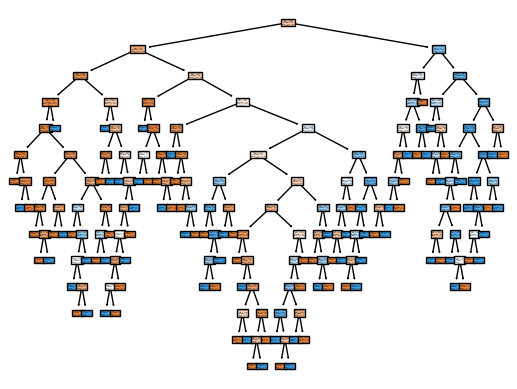

In [56]:
# %load ml27.py
# Decision Tree Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
dtc = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(f'Train Accuracy: {dtc.score(X_train, y_train):.2%}')
print(f'Test Accuracy: {dtc.score(X_test, y_test):.2%}')
plot_tree(dtc, feature_names=header[:-1], class_names=['0', '1'], filled=True)
plt.show()

Train accuracy: 77.26%
Test accuracy: 71.35%


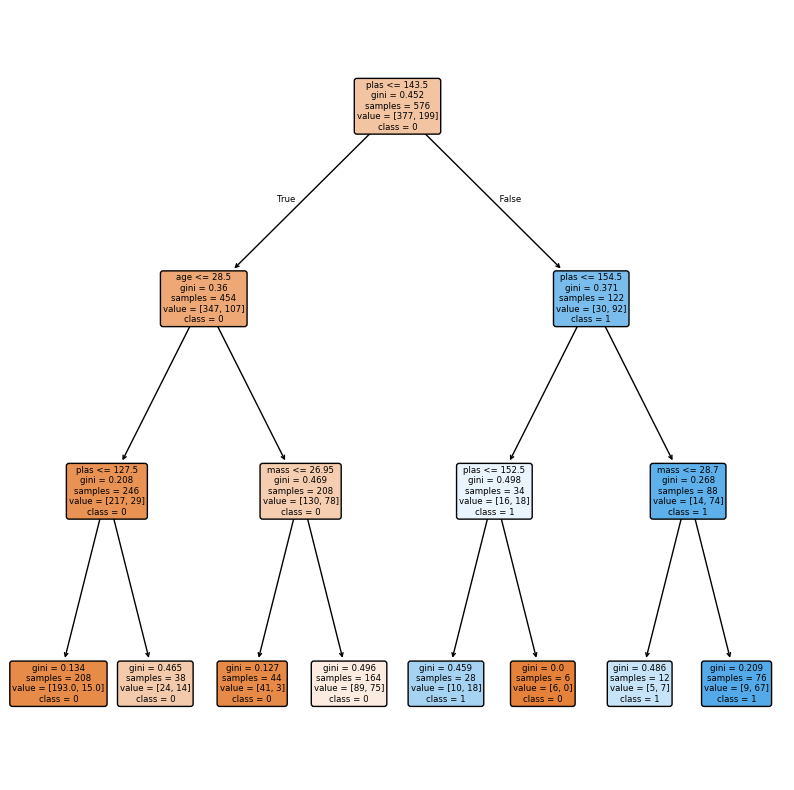

In [59]:
# %load ml28.py
# Decision Tree Classification with pre-pruning using max_depth
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
dtc = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train, y_train)
print(f'Train accuracy: {dtc.score(X_train, y_train):.2%}')
print(f'Test accuracy: {dtc.score(X_test, y_test):.2%}')
# Plot decision tree
plt.figure(figsize=(10, 10))
plot_tree(dtc, feature_names=header, class_names=['0', '1'], rounded=True, filled=True)
plt.show()


In [63]:
# %load ml29.py
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import RandomForestClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_leaf_nodes=6, random_state=42).fit(X_train, y_train)
print(f'Accuracy: {rfc.score(X_test, y_test):.2%}')


Accuracy: 75.00%


In [68]:
# %load ml30.py
# Gradient Boosting Tree Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import GradientBoostingClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
gbc = GradientBoostingClassifier(max_depth=2, random_state=42).fit(X_train, y_train)
print(f'Accuracy: {gbc.score(X_test, y_test):.2%}')

Accuracy: 74.48%


In [69]:
# Preprocessing the Titanic dataset
import pandas as pd

df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
cols = ['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
df2 = df[cols]
df2.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [75]:
df2.isna().sum()

Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [76]:
df2 = df2.fillna({'Age': df2['Age'].median()})
df2.isna().sum()

Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [77]:
df3 = pd.get_dummies(df2, columns=['Gender'])
df3.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Gender_female,Gender_male
0,3,22.0,1,0,7.2500,0,False,True
1,1,38.0,1,0,71.2833,1,True,False
2,3,26.0,0,0,7.9250,1,True,False
3,1,35.0,1,0,53.1000,1,True,False
4,3,35.0,0,0,8.0500,0,False,True


In [78]:
df3.to_csv("data/titanic_processed.csv", index=False)